In [1]:
import pandas as pd
import numpy as np

In [2]:
pip = pd.read_csv("~/storage/data/physicists/pip-counts-2021-02-24.csv", parse_dates=["date"])
pip

,date,os,project,version,count
0,2016-01-24,Linux,astropy,0,1
1,2016-01-31,Linux,astropy,0,2
2,2016-02-03,Linux,astropy,0,1
3,2016-02-22,Darwin,astropy,0,1
4,2016-02-24,Linux,astropy,0,1
...,...,...,...,...,...
100505,2021-02-18,Linux,zfit,0.5,4
100506,2021-02-21,Linux,zfit,0.5,1
100507,2021-02-22,Linux,zfit,0.5,2
100508,2021-02-23,Linux,zfit,0.5,2


<AxesSubplot:>

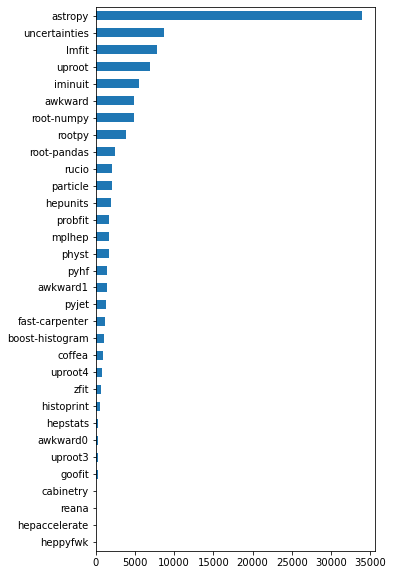

In [3]:
pip["project"].value_counts(ascending=True).plot.barh(figsize=(5, 10))

In [4]:
uproot1 = pip[(pip["project"] == "uproot") & (pip["version"].str[0:2] == "1.")].copy()
uproot2 = pip[(pip["project"] == "uproot") & (pip["version"].str[0:2] == "2.")].copy()
uproot3 = pip[((pip["project"] == "uproot") & (pip["version"].str[0:2] == "3.")) | ((pip["project"] == "uproot3") & (pip["version"].str[0:2] == "3."))].copy()
uproot4 = pip[((pip["project"] == "uproot") & (pip["version"].str[0:2] == "4.")) | ((pip["project"] == "uproot4") & (pip["version"].str[0:2] == "0."))].copy()
uproot_total = pip[(pip["project"] == "uproot") | (pip["project"] == "uproot3") | ((pip["project"] == "uproot4") & (pip["version"].str[0:2] == "0."))].copy()

uproot1["project"] = "Uproot 1.x"
uproot2["project"] = "Uproot 2.x"
uproot3["project"] = "Uproot 3.x"
uproot4["project"] = "Uproot 4.x"
uproot_total["project"] = "Uproot (all versions)"

In [5]:
awkward0 = pip[((pip["project"] == "awkward") & (pip["version"].str[0:2] == "0.")) | ((pip["project"] == "awkward0") & (pip["version"].str[0:2] == "0."))].copy()
awkward1 = pip[((pip["project"] == "awkward") & (pip["version"].str[0:2] == "1.")) | ((pip["project"] == "awkward1") & (pip["version"].str[0:2] == "0."))].copy()
awkward_total = pip[(pip["project"] == "awkward") | (pip["project"] == "awkward0") | ((pip["project"] == "awkward1") & (pip["version"].str[0:2] == "0."))].copy()

awkward0["project"] = "Awkward 0.x"
awkward1["project"] = "Awkward 1.x"
awkward_total["project"] = "Awkward (all versions)"

In [6]:
coffea06 = pip[((pip["project"] == "coffea") & (pip["version"] == "0.6"))].copy()
coffea07 = pip[((pip["project"] == "coffea") & (pip["version"] == "0.7"))].copy()
coffea_total = pip[((pip["project"] == "coffea"))].copy()

coffea06["project"] = "Coffea 0.6.x"
coffea07["project"] = "Coffea 0.7.x"
coffea_total["project"] = "Coffea (all versions)"

In [7]:
pip = pd.concat([pip, uproot1, uproot2, uproot3, uproot4, uproot_total, awkward0, awkward1, awkward_total, coffea06, coffea07, coffea_total])

In [8]:
pip.set_index(["project", "date"], inplace=True)
pip

os   version  count
project               date                               
astropy               2016-01-24   Linux         0      1
                      2016-01-31   Linux         0      2
                      2016-02-03   Linux         0      1
                      2016-02-22  Darwin         0      1
                      2016-02-24   Linux         0      1
...                                  ...       ...    ...
Coffea (all versions) 2021-02-12   Linux  0.7.0rc1      1
                      2021-02-14   Linux  0.7.0rc1      1
                      2021-02-20   Linux  0.7.0rc1      1
                      2021-02-22   Linux  0.7.0rc1      1
                      2021-02-24   Linux  0.7.0rc1      1

[130560 rows x 3 columns]

In [9]:
packages = pip.index.levels[0].tolist()
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["iminuit"].index).fillna(0)

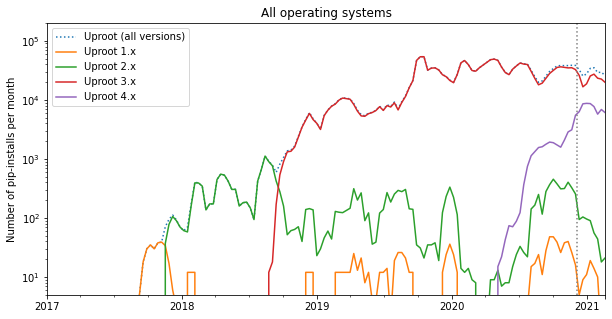

In [10]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x"
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS-pip/pip-allos-uproot-log.svg")
ax.get_figure().savefig("PLOTS-pip/pip-allos-uproot-log.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-allos-uproot-log.png")

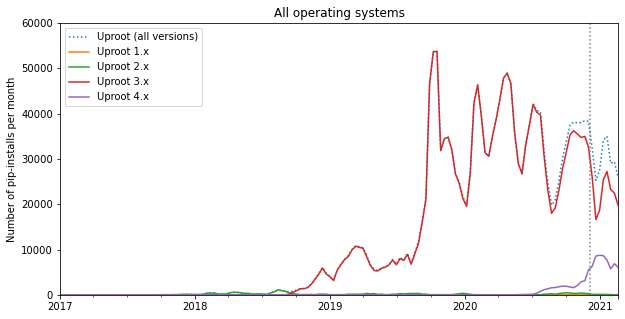

In [11]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x"
]].rolling(3).sum().plot(logy=False, style=[":", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 60000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS-pip/pip-allos-uproot-lin.svg")
ax.get_figure().savefig("PLOTS-pip/pip-allos-uproot-lin.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-allos-uproot-lin.png")

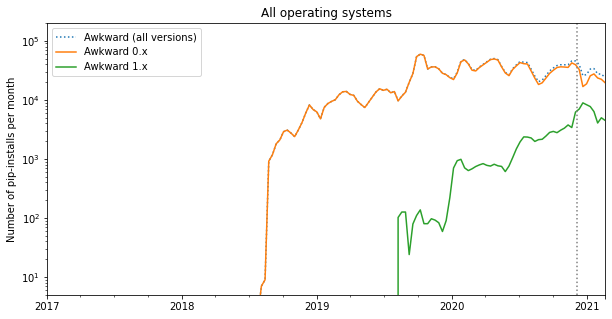

In [12]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS-pip/pip-allos-awkward-log.svg")
ax.get_figure().savefig("PLOTS-pip/pip-allos-awkward-log.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-allos-awkward-log.png")

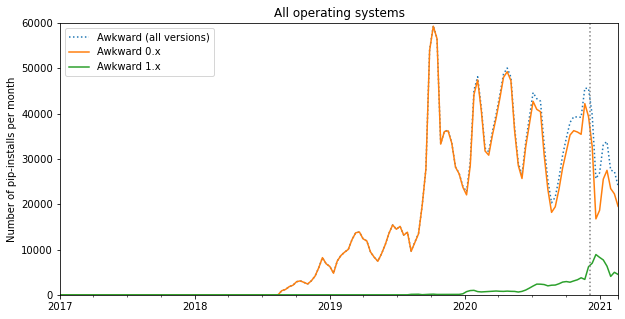

In [13]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x",
]].rolling(3).sum().plot(logy=False, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 60000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS-pip/pip-allos-awkward-lin.svg")
ax.get_figure().savefig("PLOTS-pip/pip-allos-awkward-lin.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-allos-awkward-lin.png")

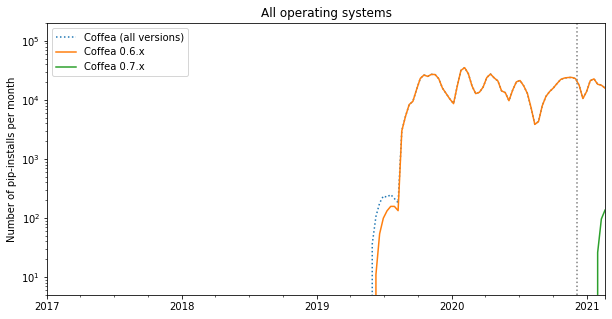

In [14]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS-pip/pip-allos-coffea-log.svg")
ax.get_figure().savefig("PLOTS-pip/pip-allos-coffea-log.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-allos-coffea-log.png")

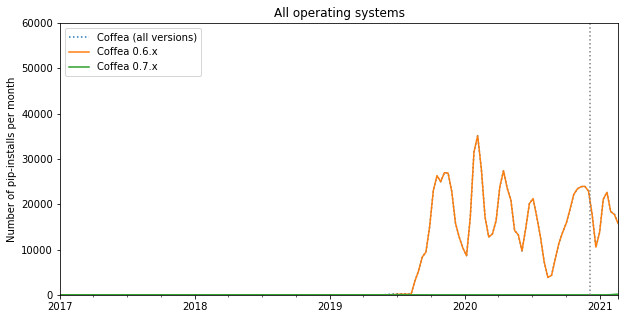

In [15]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(3).sum().plot(logy=False, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 60000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS-pip/pip-allos-coffea-lin.svg")
ax.get_figure().savefig("PLOTS-pip/pip-allos-coffea-lin.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-allos-coffea-lin.png")

<AxesSubplot:>

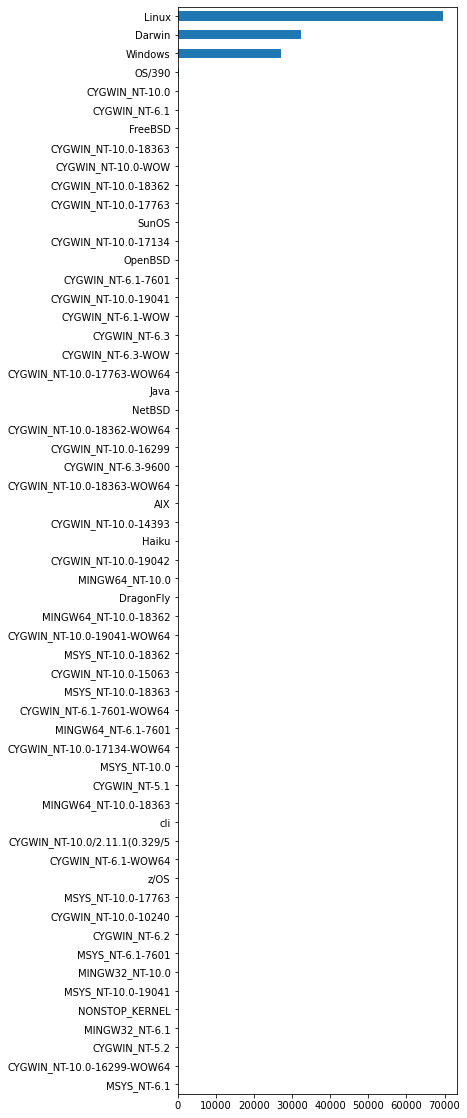

In [16]:
pip["os"].value_counts(ascending=True).plot.barh(figsize=(5, 20))

In [17]:
pip = pip[(pip["os"] == "Darwin") | (pip["os"] == "Windows")]

In [18]:
packages = pip.index.levels[0].tolist()
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["iminuit"].index).fillna(0)

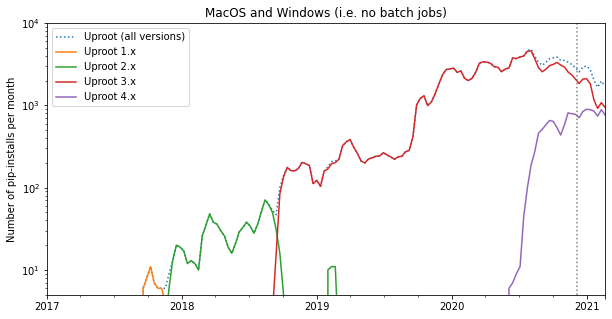

In [19]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x"
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-uproot-log.svg")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-uproot-log.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-uproot-log.png")

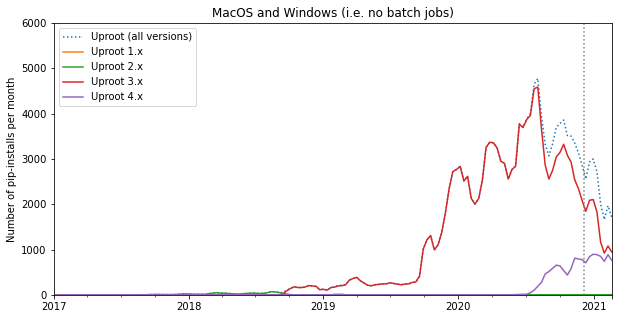

In [20]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x"
]].rolling(3).sum().plot(logy=False, style=[":", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 6000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-uproot-lin.svg")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-uproot-lin.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-uproot-lin.png")

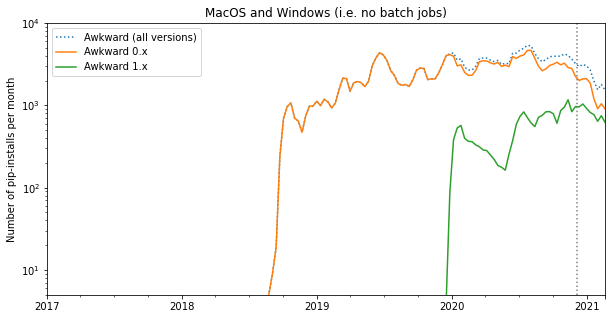

In [21]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-awkward-log.svg")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-awkward-log.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-awkward-log.png")

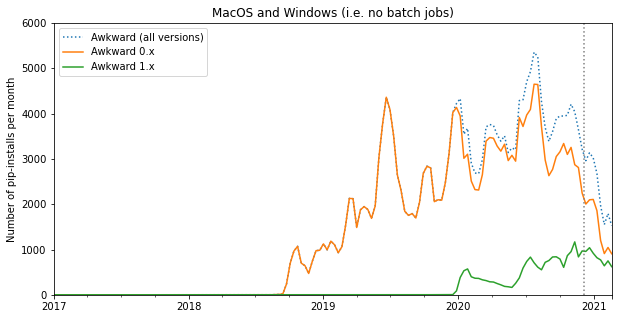

In [22]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x",
]].rolling(3).sum().plot(logy=False, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 6000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-awkward-lin.svg")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-awkward-lin.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-awkward-lin.png")

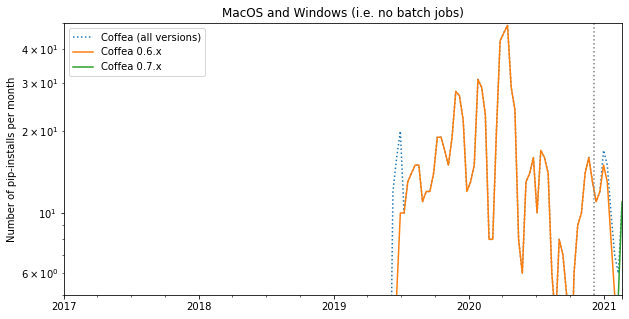

In [23]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 50)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-coffea-log.svg")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-coffea-log.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-coffea-log.png")

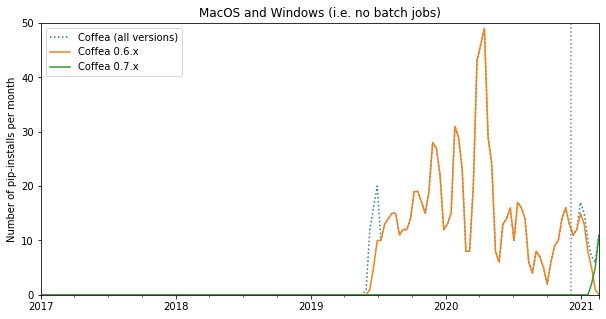

In [24]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(3).sum().plot(logy=False, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 50)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-coffea-lin.svg")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-coffea-lin.pdf")
ax.get_figure().savefig("PLOTS-pip/pip-macwin-coffea-lin.png")